以下是《白话机器学习的数学 (立石贤吾)》书上的感知机线性分类的算法，训练数据能正确分了，个人觉得实际误差较大。   
参考：  
https://blog.csdn.net/pxhdky/article/details/86360535  
https://zhuanlan.zhihu.com/p/30155870  
加入学习率

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# 确保matplotlib能够显示中文
mpl.rcParams["font.sans-serif"] = ["Microsoft YaHei"]
# 确保matplotlib能够正常显示负号
mpl.rcParams["axes.unicode_minus"] = False

In [2]:
# 以下是通用函数
def z_score(tds, v=None):
    if v:
        return (v - tds.mean()) / tds.std()
    else:
        return (tds - tds.mean()) / tds.std()
    
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

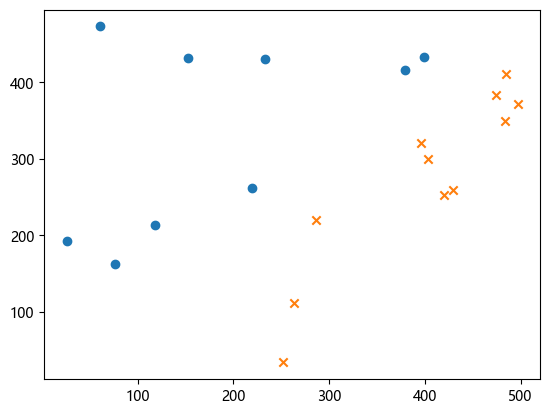

In [3]:
# 加载训练数据集
tds = np.loadtxt('dataset_感知机.csv', delimiter=',', dtype='int', skiprows=1)
m = len(tds)
tds_x_1 = tds[:,0]
tds_x_2 = tds[:,1]
tds_y = tds[:,2]
c_m1 = tds[tds[:,2]==-1]
c_1 = tds[tds[:,2]==1]
plt.scatter(c_m1[:,0], c_m1[:,1], marker='o')
plt.scatter(c_1[:,0], c_1[:,1], marker='x')

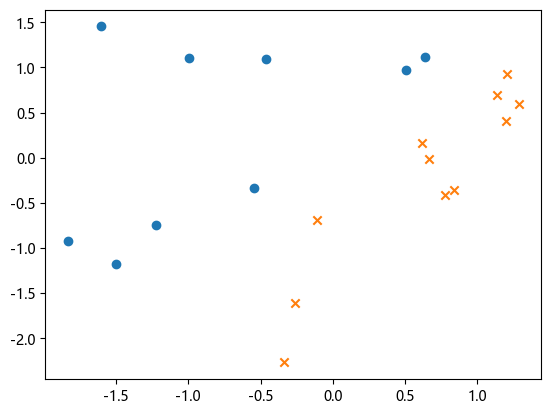

In [4]:
std_tds_x_1 = z_score(tds_x_1)
std_tds_x_2 = z_score(tds_x_2)
std_tds = np.vstack([std_tds_x_1, std_tds_x_2, tds_y]).T
std_c_m1 = std_tds[std_tds[:,2]==-1]
std_c_1 = std_tds[std_tds[:,2]==1]
plt.scatter(std_c_m1[:,0], std_c_m1[:,1], marker='o')
plt.scatter(std_c_1[:,0], std_c_1[:,1], marker='x')

In [5]:
def line_fun(theta, x):
    return np.dot(x, theta)

def f(theta, x):
    if line_fun(theta, x) >= 0:
        return 1
    else:
        return -1


In [6]:
train_x = np.vstack([np.ones(m), std_tds_x_1, std_tds_x_2]).T
theta = np.random.rand(3)
# 下面是我自己想的算法，只要所有的训练数据都通过了，就停止训练
# 书上的代码循环10次实际没用，因为通过测试了，循环体不会实际执行
# 但是是不是10次够也不知道，那么就运行到训练数据都通过就好了
# 看了参考链接，我这个想法是对的，就是所有点都分类完了就结束就ok了。
ETA = 1e-2
finished = False
count = 0
while not finished:
    count += 1
    finished = True
    for x, y in zip(train_x, tds_y):
        if f(theta, x) != y:
            theta = theta + ETA * y * x
            finished = False

print(count)
print("θ：", theta)


8
θ： [ 0.00418664  0.08412134 -0.06062749]


True True True True True True True True True True True True True True True True True True True True 

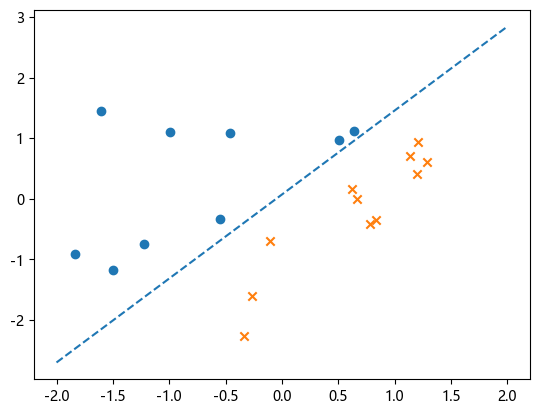

In [7]:
plt.scatter(std_c_m1[:,0], std_c_m1[:,1], marker='o')
plt.scatter(std_c_1[:,0], std_c_1[:,1], marker='x')

plt_x = np.linspace(-2, 2, 100)
plt.plot(plt_x, -(theta[0] + theta[1] * plt_x) / theta[2], linestyle='dashed')

# 图片中点的坐标是中心点，线很可能擦过，所以用下面循环看下是不是都ok。
for x, y in zip(train_x, tds_y):
    if f(theta, x) != y:
        print("False", end=' ')
    else:
        print("True", end=' ')

In [8]:
# 预测一下看看
print(f(theta, np.array([1, z_score(tds_x_1, 200), z_score(tds_x_2, 250)])))

print(f(theta, np.array([1, z_score(tds_x_1, 300), z_score(tds_x_2, 250)])))

-1
1
